# Dental Anatomy Detection With YOLO11

Author: **Marcin Sikorski**<br>
Date: March, 2025

**Introduction & Motivation**<br>
Object detection is a fundamental and impactful area of exploration in computer vision and video processing, with wide-ranging applications across diverse domains. Lately, one popular network for these type of applications is the You Only Look Once (YOLO) which revolutionized real-time object identification. Its architecture is specifically designed for efficient object detection. YOLO has enhanced flexibility and computational efficiency. This model is a popular algorithm because it achieves high accuracy while also being able to run in real-time. This algorithm "only looks once" at the image in the sense that it requires only one forward propagation pass through the network to make predictions. This object detection system is based on convolutional neural networks. After non-max suppression, it then outputs recognized objects together with the bounding boxes. First introduced in a [paper](https://arxiv.org/pdf/1506.02640v5) by Joseph Redmon et al. in 2015.

This notebook introduces a dental anatomy detection with the usage of YOLO11. The data for this notebook originates from [Roboflow](https://universe.roboflow.com/dataset-ntw3s/dental_dataset_level3_basic). The dataset contains three folders: test, train, and validation. Also, a YAML file is included which contains all class names and necessary path variables. Each folder contains images and annotations respectively with their labels:
* 107 test images,
* 505 train images,
* 112 validation images.

**Notebook Content:**
1. Plot Data
2. Initialize and Train YOLO11 Model
3. Model Evaluation
4. Run Predictions
5. Conclusions

In [ ]:
# installs: sympy, torch, ultralytics-thop, torchvision, ultralytics
pip install ultralytics wandb

In [1]:
import os
# disable Weights & Biases integration globally
os.environ['WANDB_MODE'] = 'disabled'

import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

### 1. Plot Data

A few sample images will be generated from the training dataset.

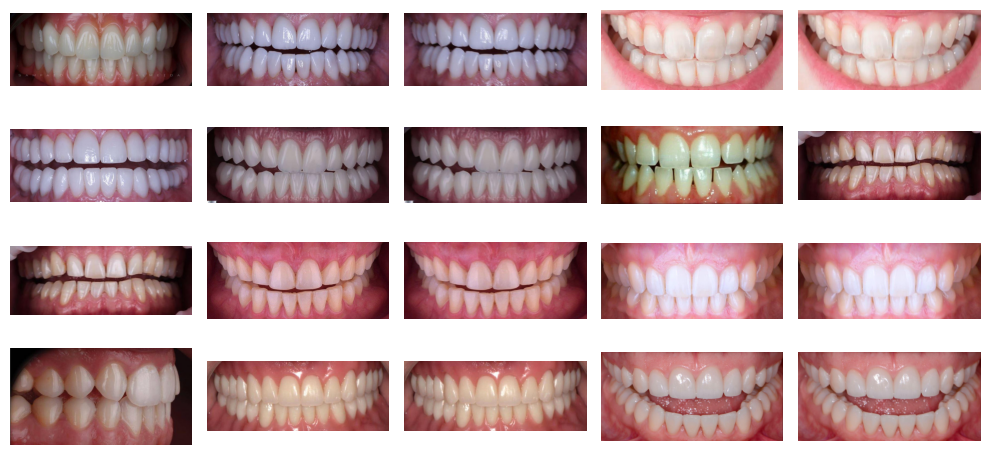

In [2]:
# set files to paths for each training image
train_images_path = os.getcwd() + '/dental-anatomy-dataset-yolov8/Dental Dataset/train/images'
images_list = os.listdir(train_images_path)

# plot first 20 images
plt.figure(figsize=(10, 5))

for i in range(20):
    img_path = os.path.join(train_images_path, images_list[i])
    img = Image.open(img_path)

    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### 2. Initialize and Train YOLO11 Model

YOLO is distributed in five sizes: nano, small, medium, large, and xlarge. Larger scaled models have more weights and tend to perform more accurately, but train and run much slower. We will implement the nano model - [YOLO11n](https://docs.ultralytics.com/models/yolo11/).

YOLO11 uses TXT annotations and a YAML configuration for its predictions. The TXT file contains information on the tooth class and its corresponding bounding box in normalized coordinates. These annotations help YOLO understand the location and classification of the objects within the image. The input to the model is a batch of images, where each image has varying dimensions (width, height, 3 channels for RGB). YOLO processes these images to detect objects of interest. The output consists of a list of bounding boxes, each associated with the predicted class, confidence score, and the location of the detected object. These results allow for precise localization and classification, with the confidence scores indicating the model's certainty in its predictions.

In [3]:
# possible results from previous runs
results_path = os.getcwd() + '/runs/detect/dental_yolo11n/results.csv'

# check if the file exists
if os.path.exists(results_path):
    os.remove(results_path)
    print('File has been removed')
else:
    print('File does not exist')

File has been removed


In [4]:
from ultralytics import YOLO

# YAML data and YOLO11n model
yaml_path = os.getcwd() + '/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml'
yolo11n_path = os.getcwd() + 'yolo11n.pt'

# implement YOLO11 nano and train it (https://docs.ultralytics.com/modes/train/)
model = YOLO('yolo11n')

results = model.train(
    model=yolo11n_path,
    imgsz=640,
    task='detect',
    mode='train',
    data=yaml_path,
    epochs=30,
    optimizer='Adam',
    batch=32,
    name='dental_yolo11n',
    exist_ok=True,
    verbose=True,
    lr0=0.001,
    lrf=0.001,
    weight_decay=0.001,
    conf=0.6,
    iou=0.7,
    project=None,
)

Ultralytics 8.3.93  Python-3.12.4 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine\trainer: task=detect, mode=train, model=C:\Users\MarcinSikorski\notebooks\teethyolo11n.pt, data=C:\Users\MarcinSikorski\notebooks\teeth/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=dental_yolo11n, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.6, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\train\labels.cacheScanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\train\labels.cache
val: Scanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\valid\labels.cache..Scanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\valid\labels.cache..


Plotting labels to runs\detect\dental_yolo11n\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\dental_yolo11n
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.036       2.99      1.056       1173        640: 100%|██████████| 16/16 [06:26<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.9778      2.004       1.01       1103        640: 100%|██████████| 16/16 [06:27<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<0


                   all        112       2437          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.9543      1.564     0.9884        949        640: 100%|██████████| 16/16 [06:33<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<0


                   all        112       2437          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.9111      1.286     0.9744       1145        640: 100%|██████████| 16/16 [06:44<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<0


                   all        112       2437          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.8946      1.115     0.9746        928        640: 100%|██████████| 16/16 [06:48<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<0


                   all        112       2437      0.138    0.00993     0.0739     0.0608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.8762      1.003     0.9746        978        640: 100%|██████████| 16/16 [06:34<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<0


                   all        112       2437      0.403      0.131      0.268      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.8596      0.924     0.9756        944        640: 100%|██████████| 16/16 [06:37<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<0


                   all        112       2437      0.529      0.268      0.404      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.8675     0.8759     0.9727       1058        640: 100%|██████████| 16/16 [06:41<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<0


                   all        112       2437      0.372      0.261      0.322       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.8412     0.8244     0.9628       1017        640: 100%|██████████| 16/16 [06:43<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<0


                   all        112       2437       0.82      0.227      0.525      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.8396     0.8052     0.9664        871        640: 100%|██████████| 16/16 [06:50<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<0


                   all        112       2437      0.885      0.442      0.668      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      0.844     0.7562     0.9684        993        640: 100%|██████████| 16/16 [05:52<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<0


                   all        112       2437      0.959      0.489      0.727      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.8325     0.7179     0.9634       1058        640: 100%|██████████| 16/16 [06:46<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.969      0.487      0.731      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.8264     0.6892     0.9657       1101        640: 100%|██████████| 16/16 [06:25<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<0


                   all        112       2437      0.941      0.503      0.724      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.8149     0.6792      0.956        879        640: 100%|██████████| 16/16 [06:41<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.877       0.54      0.709      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.7956     0.6542      0.953        904        640: 100%|██████████| 16/16 [06:54<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.953       0.73      0.846      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.8086     0.6405     0.9487        992        640: 100%|██████████| 16/16 [06:58<00:00, 26.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<0


                   all        112       2437      0.943       0.74      0.849      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.8035     0.6204     0.9543        958        640: 100%|██████████| 16/16 [07:32<00:00, 28.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.959      0.761      0.864      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.7938     0.6033     0.9464        969        640: 100%|██████████| 16/16 [06:56<00:00, 26.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<0


                   all        112       2437      0.932      0.814      0.878      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.7895     0.5913     0.9493       1034        640: 100%|██████████| 16/16 [07:05<00:00, 26.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<0


                   all        112       2437      0.961      0.802      0.886      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.7815     0.5782     0.9432       1072        640: 100%|██████████| 16/16 [07:24<00:00, 27.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<0


                   all        112       2437      0.963       0.84      0.908      0.738
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.7747     0.7102     0.9591        551        640: 100%|██████████| 16/16 [06:24<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<0


                   all        112       2437      0.799      0.599      0.695      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.7577     0.5854     0.9386        510        640: 100%|██████████| 16/16 [06:38<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<0


                   all        112       2437      0.907      0.668      0.785      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      0.758     0.5593     0.9402        513        640: 100%|██████████| 16/16 [06:17<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<0


                   all        112       2437      0.937      0.798      0.871      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7445     0.5244      0.935        519        640: 100%|██████████| 16/16 [06:22<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<0


                   all        112       2437      0.952      0.847      0.907      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7371     0.5096     0.9336        488        640: 100%|██████████| 16/16 [06:53<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<0


                   all        112       2437      0.954      0.854      0.913       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7315     0.4963     0.9275        514        640: 100%|██████████| 16/16 [06:39<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.947      0.868      0.917      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7283     0.4926     0.9304        523        640: 100%|██████████| 16/16 [06:41<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<0


                   all        112       2437      0.952      0.888      0.929      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7288     0.4799     0.9287        530        640: 100%|██████████| 16/16 [06:29<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<0


                   all        112       2437      0.958      0.913      0.943      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.719      0.469     0.9241        552        640: 100%|██████████| 16/16 [06:33<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.955      0.901      0.937      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7206     0.4701     0.9265        486        640: 100%|██████████| 16/16 [06:31<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<0


                   all        112       2437      0.961      0.901       0.94      0.766

30 epochs completed in 3.523 hours.
Optimizer stripped from runs\detect\dental_yolo11n\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\dental_yolo11n\weights\best.pt, 5.5MB

Validating runs\detect\dental_yolo11n\weights\best.pt...
Ultralytics 8.3.93  Python-3.12.4 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<0


                   all        112       2437      0.961        0.9      0.939      0.767
             1st Molar        106        323      0.924       0.83      0.887      0.664
          1st Premolar        111        386      0.974      0.972      0.981      0.797
             2nd Molar         74        157      0.927       0.65        0.8      0.564
          2nd Premolar        109        364      0.957      0.912      0.945       0.71
                Canine        112        401      0.985       0.97      0.984      0.862
       Central Incisor        112        403      0.983      0.995      0.991      0.892
       Lateral Incisor        112        403       0.98      0.973      0.985      0.876
Speed: 2.6ms preprocess, 127.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\dental_yolo11n


In [5]:
# save the best model weights after training
best_weights = os.getcwd() + '/runs/detect/dental_yolo11n/weights/best.pt'

# path to test images
test_images_path = os.getcwd() + '/dental-anatomy-dataset-yolov8/Dental Dataset/test/images'

# perform predictions on the test dataset
results = model.predict(
    source=test_images_path,
    device=None,
    save=False,
    imgsz=640,
    conf=0.6,
    iou=0.7,
    project=None,
    verbose=False,
)

print('All images preprocessed')

All images preprocessed


### 3. Model Evaluation

We will evaluate YOLO's performance on the test dataset using basic evaluation metrics. The results will include images generated by the network, such as: training results, learning curves, confusion matrices, and label correlograms.

In [6]:
from pprint import pprint

# evaluate YOLO11 model
val_metrics = model.val(
    data=yaml_path,
    imgsz=640,
    conf=0.6,
    iou=0.7,
    project=None,
    verbose=True,
)

# display available metrics from the dictionary
# B - box, M - mask
print('\nAvailable metrics:')
for key, value in val_metrics.results_dict.items() :
    print('\t' + key)

print(f'\nSave path: {val_metrics.save_dir}')
print(f'Class indices: {val_metrics.ap_class_index}')
print(f'Labels:')
pprint(val_metrics.names)
print(f'Available curves: {val_metrics.curves}')

Ultralytics 8.3.93  Python-3.12.4 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)


val: Scanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\valid\labels.cache..Scanning C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\valid\labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<0


                   all        112       2437      0.961      0.897      0.937      0.765
             1st Molar        106        323      0.922      0.808      0.876       0.66
          1st Premolar        111        386      0.977      0.972      0.981      0.794
             2nd Molar         74        157      0.927      0.643      0.795      0.564
          2nd Premolar        109        364      0.959      0.909      0.944      0.707
                Canine        112        401       0.98      0.975      0.986      0.864
       Central Incisor        112        403      0.983      0.995      0.991      0.891
       Lateral Incisor        112        403      0.983      0.975      0.986      0.877
Speed: 2.1ms preprocess, 94.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\dental_yolo11n

Available metrics:
	metrics/precision(B)
	metrics/recall(B)
	metrics/mAP50(B)
	metrics/mAP50-95(B)
	fitness

Save path: runs\detect\dental_yolo11n
Class indices

* **Precision**: The ratio of true positive predictions to the total predicted positives.<br>
* **Recall**: The ratio of true positives to the total actual positives.<br>
* **mAP@50**: Mean average precision calculated at IoU (Intersection over Union) threshold of 0.5.<br>
* **mAP@50:95**: Mean average precision averaged over multiple IoU thresholds (typically from 0.5 to 0.95 in increments).

In [7]:
# extract metrics from the dictionary and display them
fitness = val_metrics.results_dict.get('fitness')
mAP_50 = val_metrics.results_dict.get('metrics/mAP50(B)')
mAP_50_95 = val_metrics.results_dict.get('metrics/mAP50-95(B)')  # if available
precision = val_metrics.results_dict.get('metrics/precision(B)')
recall = val_metrics.results_dict.get('metrics/recall(B)')
f1_score = 2 * (precision * recall) / (precision + recall)

print('----- Evaluation metrics for all classes -----')
print(f'Fitness: {fitness:.6f}')
print(f'mAP (IoU=0.5): {mAP_50:.6f}')
print(f'mAP (IoU=0.5:0.95): {mAP_50_95:.6f}' if mAP_50_95 is not None else 'mAP (IoU=0.5:0.95) not available')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1_score:.6f}')

----- Evaluation metrics for all classes -----
Fitness: 0.782545
mAP (IoU=0.5): 0.936888
mAP (IoU=0.5:0.95): 0.765396
Precision: 0.961449
Recall: 0.896784
F1 Score: 0.927992


The fitness metric in YOLO networks is a composite score that helps evaluate the overall performance of the model, balancing precision and recall with a focus on the mAP (mean average precision) values. The exact formula for fitness can vary by implementation, but it generally aims to reward models that achieve a good balance between precision and recall, along with robust performance across various IoU thresholds. Common approaches:

* unweighted average (treating each metric equally):
$$\text{fitness} = \frac{\text{mAP@50} + \text{mAP@50:95} + \text{precision} + \text{recall}}{4},$$

* weighted average (some metrics are more heavily than others based on their importance, usually mAP is often considered the most important metric for object detection tasks and tends to be higher):
$$\text{fitness} = w_{1} \times \text{mAP@50} + w_{2} \times \text{mAP@50:95} + w_{3} \times \text{precision} + w_{4} \times \text{recall}.$$

Interpretation:
* Higher fitness values indicate better model performance, reflecting that the model is achieving a good trade-off between precision and recall while maintaining strong mAP scores.
* Lower fitness values suggest that the model may be struggling in one or more areas, indicating potential issues with detection quality or class imbalance.

The fitness in our case is weighted. We can find the weights using a least squares method, particularly if we are looking to model fitness as a linear combination of the other metrics. We want to find the weights $w_{1}$, $w_{2}$, $w_{3}$, $w_{4}$ that best fit the equation using the least squares method.

In [8]:
import numpy as np
from numpy.linalg import lstsq

# X - input matrix as a single row (metrics: mAP@50, mAP@50-95, precision, recall)
# y - output vector (fitness)
X = np.array([[mAP_50, mAP_50_95, precision, recall]])
y = np.array([fitness])

# use the least squares method to calculate the weights
weights, _, _, _ = lstsq(X, y, rcond=None)

print('Calculated weights:', weights)

Calculated weights: [    0.22967     0.18763     0.23569     0.21984]


In [9]:
# recalculate fitness with new weights to check correctness
def fitness(x, weights):
    '''
    Calculate weighted fitness.
    '''
    # weights for [mAP@50, mAP@50-95, precision, recall]
    w = np.array(weights)
    return np.sum(x * w, axis=1)

metric_weights = [0.22967, 0.18763, 0.23569, 0.21984]
print(f'Fitness: {fitness(x=X, weights=metric_weights)[0]:.6f}')

Fitness: 0.782539


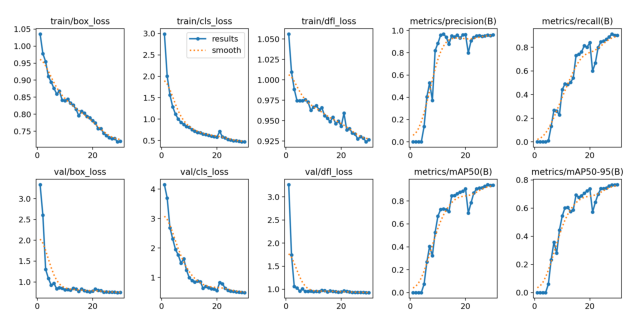

In [10]:
learning_curves = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/results.png')

# plot learning curves
plt.figure(figsize=(8, 5))
plt.imshow(learning_curves)
plt.axis('off')
plt.show()

The model shows significant progress over time, and by epoch 30, it achieves a very good performance with high precision, recall, and mAP. However, slight improvements could still be made in the strictness of localization (mAP@50 and mAP@50:95).

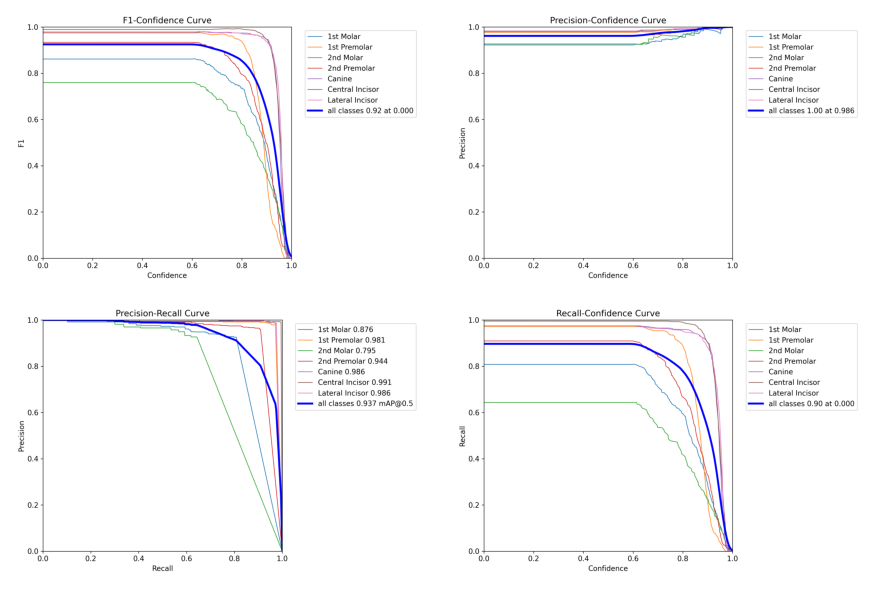

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
axes = axes.flatten()

f1_curve = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/F1_curve.png')
prec_conf_curve = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/P_curve.png')
prec_rec_curve = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/PR_curve.png')
rec_conf_curve = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/R_curve.png')

axes[0].imshow(f1_curve)
axes[0].set_title(None)
axes[0].set_axis_off()

axes[1].imshow(prec_conf_curve)
axes[1].set_title(None)
axes[1].set_axis_off()

axes[2].imshow(prec_rec_curve)
axes[2].set_title(None)
axes[2].set_axis_off()

axes[3].imshow(rec_conf_curve)
axes[3].set_title(None)
axes[3].set_axis_off()

plt.tight_layout()
plt.show()

The curves demonstrate the model's strong learning ability across various thresholds, with high areas under the curves. The 2nd molar class (represented in green) shows a slightly lower area, suggesting it may be more challenging for the model to detect or classify accurately. All curves indicate a good trade-off between each metric and confidence (and precision vs. recall), reflecting balanced performance.

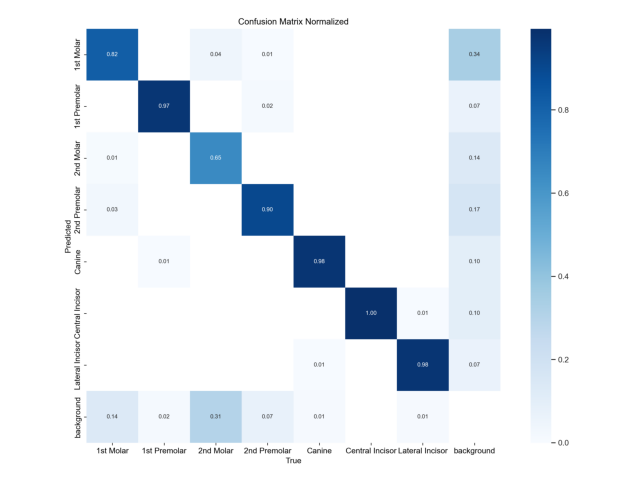

In [12]:
confu_matrix = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/confusion_matrix_normalized.png')

# plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confu_matrix)
plt.axis('off')
plt.show()

The confusion matrix shows strong classification results overall. The model occasionally confuses the two molar classes, which is reasonable given their visual similarity. Additionally, molars are the most frequently misclassified as background, suggesting that their features might blend into the image surroundings. Despite these minor misclassifications, the YOLO model demonstrates a strong ability to recognize dental anatomy accurately.

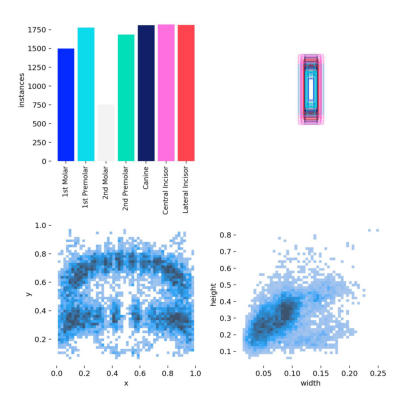

In [13]:
labels_img = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/labels.jpg')

# plot 'labels' image
plt.figure(figsize=(5, 5))
plt.imshow(labels_img)
plt.axis('off')
plt.show()

Explaination:
1. Top-left: Visual illustration of annotation frequencies (quantity) for each category in the dataset; incisors and canines are the most frequent, while second molars are the least numerous.
2. Top-right: Provides an overview of the positions and sizes of the bounding boxes in the dataset. This study aims to get a sense of the arrangement patterns variation of the bounding boxes in the dataset. The color of the box corresponds to the category's color in the bar chart.
6. Bottom-left: Statistical spread of bounding box positions; $x$, $y$ dimensions are normalized and the density displays dental arches.
7. Bottom-right: Statistical distribution of bounding box dimensions. The cell shows a linear trend across the given dataset in terms of box size.

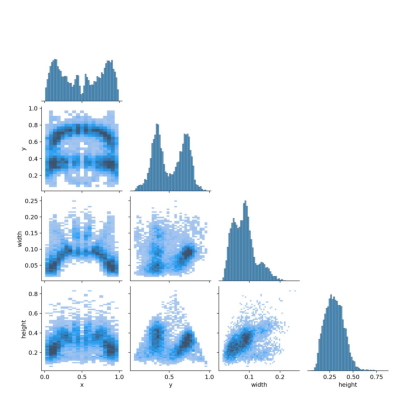

In [14]:
correlogram_img = Image.open(os.getcwd() + '/runs/detect/dental_yolo11n/labels_correlogram.jpg')

# plot 'labels correlogram' image
plt.figure(figsize=(5, 5))
plt.imshow(correlogram_img)
plt.axis('off')
plt.show()

This plot is a label correlogram of the various instances within the dataset. The figure demonstrates how labels are placed on the horizontal and vertical axes of a matrix or heatmap. This visual representation is crucial for a thorough comprehension of how different labels relate to each other and provides detailed insights into their patterns of co-occurrence within the dataset. The strength of the correlation between labels is visually conveyed through the intensity or hue of the cells. Higher-intensity or dark-colored cells are indicative of a strong positive correlation, suggesting a significant probability of concurrence among the corresponding categories. In contrast, lower-intensity or light-colored cells indicate a weaker or negative correlation, indicating a lower chance of co-occurrence among the seven categories.

### 4. Run Predictions

After evaluating the YOLO network, it is time to perform example predictions. We will run several examples on images from the test dataset. For each detected object in an image, we will compute the following scores:
1. The **confidence score** in YOLO object detection represents the model's certainty that a detected object exists in the given bounding box. It is a probability value between 0 and 1. For each predicted bounding box, YOLO calculates:
* objectness score: probability that an object exists in the box;
* class probability: probability that the object belongs to a specific class (e.g., 'Lateral Incisor' or 'Canine').

This gives us the formula:

$$\text{Confidence Score}=\text{Objectness} \times \text{Class Probability}.$$

This means that the confidence score is low when the model is uncertain either about the presence of an object or about its correct classification.

2. **IoU** (intersection over union or Jaccard's index) is a popular metric to measure localization accuracy and compute localization errors in object detection models. This metric describing the amount of overlapping among two bounding boxes: a predicted bounding box $A$ and a ground truth bounding box $B$. IoU is the ratio of the intersection of the two boxes' areas to their combined areas. This is represented with formula:

$$\text{IoU}=\frac{A \cap B}{A \cup B}=\frac{\text{Area of Overlap}}{\text{Area of Union}}=\frac{\text{Intersection Area}}{\text{Union Area}}.$$

We will also display, for each run, other object detection scores: precision, recall, F1 score, mAPs, and fitness.

The following `ValidateYOLO` class is the main class for performing dental detection. Here are the executed steps:
1. Loads the YOLO model, particularly its approximated weights.
2. Reads the ground truth annotations - these are necessary to compute IoU values and for comparison purposes.
3. Computes the run's evaluation metrics: precision, recall, F1 score, mAP, and fitness.
4. Performs object detecting: assigns labels and extracts the bounding box coordinates.
5. Displays predictions, ground truth values in tabular form, and evaluation scores.

In [15]:
import cv2
import pandas as pd

class ValidateYOLO:
    def __init__(self, model_path, source='', label_file='', verbose=False, save_results=False):
        self.model_path = model_path
        self.source = source
        self.label_file = label_file
        self.verbose = verbose
        self.save_results = save_results

    def load_model(self):
        '''
        Load trained YOLO model from path to weights.
        '''
        return YOLO(self.model_path)

    def read_labels(self, img_width, img_height):
        '''
        Read label file and convert normalized bbox coordinates to absolute values (pixels).
        '''
        if not os.path.exists(self.label_file):
            raise FileNotFoundError(f'Label file not found: {self.label_file}')

        label_map = {
            0: '1st Molar',
            1: '1st Premolar',
            2: '2nd Molar',
            3: '2nd Premolar',
            4: 'Canine',
            5: 'Central Incisor',
            6: 'Lateral Incisor'
        }

        ground_truths = []
        with open(self.label_file, 'r') as file:
            for line in file.readlines():
                parts = line.strip().split()
                cls = int(parts[0])
                x_center, y_center, w, h = map(float, parts[1:])

                x1 = int((x_center - w / 2) * img_width)
                y1 = int((y_center - h / 2) * img_height)
                x2 = int((x_center + w / 2) * img_width)
                y2 = int((y_center + h / 2) * img_height)

                ground_truths.append({
                    'true_class': cls,
                    'true_label': label_map.get(cls, 'Unknown'),
                    'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2
                })
                
        return ground_truths

    def iou(self, boxA, boxB):
        '''
        Compute IoU (intersection over union) between two bounding boxes.
        '''
        xA = max(boxA['x1'], boxB['x1'])
        yA = max(boxA['y1'], boxB['y1'])
        xB = min(boxA['x2'], boxB['x2'])
        yB = min(boxA['y2'], boxB['y2'])

        inter_area = max(0, xB - xA) * max(0, yB - yA)
        boxA_area = (boxA['x2'] - boxA['x1']) * (boxA['y2'] - boxA['y1'])
        boxB_area = (boxB['x2'] - boxB['x1']) * (boxB['y2'] - boxB['y1'])

        union_area = float(boxA_area + boxB_area - inter_area)

        return inter_area / union_area if union_area > 0 else 0

    def compute_metrics(self, predictions, ground_truths):
        '''
        Compute: precision, recall, F1 score, mAP, and fitness.
        '''
        # TP - true positive
        # FP - false positive
        # FN - false negative
        TP, FP, FN = 0, 0, 0
        used_gt = set()

        # match predictions to ground truths using IoU
        matched_predictions = []
        for pred in predictions:
            best_iou, best_match, best_match_idx = 0, None, -1

            for idx, gt in enumerate(ground_truths):
                iou_score = self.iou(pred, gt)
                if iou_score > best_iou and idx not in used_gt:
                    best_iou = iou_score
                    best_match = gt
                    best_match_idx = idx

            # IoU threshold for correct match
            if best_match and best_iou >= 0.5:
                TP += 1
                used_gt.add(best_match_idx)
                matched_predictions.append({
                    'pred_class': pred['class'],
                    'true_class': best_match['true_class'],
                    #'pred_label': pred['label'],
                    'true_label': best_match['true_label'],
                    'confidence': pred['confidence'],
                    'iou': best_iou,
                    #'pred_x1': pred['x1'], 'pred_y1': pred['y1'],
                    #'pred_x2': pred['x2'], 'pred_y2': pred['y2'],
                    #'true_x1': best_match['x1'], 'true_y1': best_match['y1'],
                    #'true_x2': best_match['x2'], 'true_y2': best_match['y2'],
                })
            else:
                FP += 1

        FN = len(ground_truths) - len(used_gt)

        # compute: precision, recall, and F1 score
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # compute mAPs (mean average precisions)
        # IoU thresholds from 0.5 to 0.95
        iou_thresholds = np.arange(0.5, 1.0, 0.05)
        average_precisions = []

        for iou_thresh in iou_thresholds:
            TP, FP = 0, 0
            used_gt = set()
            
            for pred in predictions:
                best_iou, best_match_idx = 0, -1
                for idx, gt in enumerate(ground_truths):
                    iou_score = self.iou(pred, gt)
                    if iou_score > best_iou and idx not in used_gt:
                        best_iou = iou_score
                        best_match_idx = idx

                if best_iou >= iou_thresh:
                    TP += 1
                    used_gt.add(best_match_idx)
                else:
                    FP += 1

            precision_at_thresh = TP / (TP + FP) if (TP + FP) > 0 else 0
            average_precisions.append(precision_at_thresh)

        # mean of all APs - for 0.5 threshold and 0.5-0.95 thresholds
        mAP_50 = average_precisions[0]
        mAP_50_95 = np.mean(average_precisions)

        # compute weighted fitness - least squares regression
        X = np.array([mAP_50, mAP_50_95, precision, recall])
        weights = X / np.sum(X)

        weighted_fitness = (weights[0] * mAP_50 +
                            weights[1] * mAP_50_95 +
                            weights[2] * precision +
                            weights[3] * recall)

        # compute unweighted fitness
        unweighted_fitness = (mAP_50 + mAP_50_95 + precision + recall) / 4
        
        return matched_predictions, precision, recall, \
        f1_score, mAP_50, mAP_50_95, weighted_fitness, unweighted_fitness

    def make_prediction(self):
        '''
        Perform object detection; returns: coordinates (bounding box), class, and confidence score.
        '''
        model = self.load_model()
        results = model.predict(source=self.source, save=False, verbose=self.verbose)

        img = cv2.imread(self.source)
        img_height, img_width = img.shape[:2]

        ground_truths = self.read_labels(img_width, img_height)

        label_map = {
            0: '1st Molar',
            1: '1st Premolar',
            2: '2nd Molar',
            3: '2nd Premolar',
            4: 'Canine',
            5: 'Central Incisor',
            6: 'Lateral Incisor'
        }

        # collect predictions in a list
        predictions = []
        for result in results:
            for box in result.boxes:
                # predicted coordinates, class, confidence score
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cls = int(box.cls.item())
                score = box.conf.item()

                predictions.append({
                    'class': cls,
                    'label': label_map.get(cls, 'Unknown'),
                    'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2,
                    'confidence': score
                })

        matched_predictions, precision, recall, f1_score, \
        mAP_50, mAP_50_95, \
        weighted_fitness, unweighted_fitness = self.compute_metrics(predictions, ground_truths)

        # convert to dataframe
        df_final = pd.DataFrame(matched_predictions)

        # export to CVS file
        if self.save_results:
            df_final.to_csv('prediction_results.csv', index=True)

        print('\n----- Detection results -----')
        print(df_final)
        print('\n----- Evaluation metrics -----')
        print(f'Precision: {precision:.6f}')
        print(f'Recall: {recall:.6f}')
        print(f'F1 Score: {f1_score:.6f}')
        print(f'mAP (IoU=0.5): {mAP_50:.6f}')
        print(f'mAP (IoU=0.5:0.95): {mAP_50_95:.6f}')
        print(f'Weighted Fitness: {weighted_fitness:.6f}')
        print(f'Unweighted Fitness: {unweighted_fitness:.6f}')

        return results

The following function is used for plotting purposes. It displays the provided dental image as a background, overlays bounding boxes with a default color map (assigning a distinct color to each class), and presents confidence values in a raster format.

In [16]:
def plot_predictions_conf(image_path, results, output_path='', color_map=None):
    '''
    Display prediction results: bounding boxes and confidence scores.
    '''
    img = cv2.imread(image_path)
    
    # default color map for classes
    if color_map is None:
        color_map = {
            0: (0, 0, 255),    # red
            1: (0, 255, 0),    # green
            2: (255, 0, 0),    # blue
            3: (255, 255, 0),  # cyan
            4: (255, 0, 255),  # magenta
            5: (0, 255, 255),  # yellow
            6: (192, 192, 192)  # silver
        }

    for result in results:
        boxes = result.boxes
        for box in boxes:
            # extract: coordinates, class, confidence score
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls.item())
            score = box.conf.item()
            label = f'{cls}: {score:.2f}'

            # default to white if class not in color_map
            color = color_map.get(cls, (255, 255, 255))
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # save image with predictions
    cv2.imwrite(output_path, img)
    print(f'\nPrediction saved as: {output_path}')

This function performs the same tasks as the previous one. However, instead of confidence scores, it takes the image's annotations as an argument and prints IoU values.

In [17]:
def plot_predictions_iou(image_path, results, label_file, output_path='', color_map=None):
    '''
    Display prediction results: bounding boxes and IoU scores.
    '''
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]

    # default color map for classes
    if color_map is None:
        color_map = {
            0: (0, 0, 255),    # red
            1: (0, 255, 0),    # green
            2: (255, 0, 0),    # blue
            3: (255, 255, 0),  # cyan
            4: (255, 0, 255),  # magenta
            5: (0, 255, 255),  # yellow
            6: (192, 192, 192)  # silver
        }

    def compute_iou(boxA, boxB):
        '''
        Compute IoU between two bounding boxes.
        '''
        xA = max(boxA['x1'], boxB['x1'])
        yA = max(boxA['y1'], boxB['y1'])
        xB = min(boxA['x2'], boxB['x2'])
        yB = min(boxA['y2'], boxB['y2'])

        inter_area = max(0, xB - xA) * max(0, yB - yA)
        boxA_area = (boxA['x2'] - boxA['x1']) * (boxA['y2'] - boxA['y1'])
        boxB_area = (boxB['x2'] - boxB['x1']) * (boxB['y2'] - boxB['y1'])

        union_area = float(boxA_area + boxB_area - inter_area)
        
        return inter_area / union_area if union_area > 0 else 0

    def read_labels(label_file, img_width, img_height):
        '''
        Read label file and convert normalized bbox coordinates to absolute values (pixels).
        '''
        label_map = {
            0: '1st Molar',
            1: '1st Premolar',
            2: '2nd Molar',
            3: '2nd Premolar',
            4: 'Canine',
            5: 'Central Incisor',
            6: 'Lateral Incisor'
        }

        ground_truths = []
        with open(label_file, 'r') as file:
            for line in file.readlines():
                parts = line.strip().split()
                cls = int(parts[0])
                x_center, y_center, w, h = map(float, parts[1:])

                # convert normalized coordinates to absolute pixel values
                x1 = int((x_center - w / 2) * img_width)
                y1 = int((y_center - h / 2) * img_height)
                x2 = int((x_center + w / 2) * img_width)
                y2 = int((y_center + h / 2) * img_height)

                ground_truths.append({
                    'class': cls,
                    'label': label_map.get(cls, 'Unknown'),
                    'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2
                })
        return ground_truths

    ground_truths = read_labels(label_file, img_width, img_height)

    for result in results:
        boxes = result.boxes
        for box in boxes:
            # extract coordinates and class
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls.item())

            # find the best IoU match from ground truths
            best_iou, best_match = 0, None
            for gt in ground_truths:
                iou_score = compute_iou({'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2}, gt)
                if iou_score > best_iou:
                    best_iou = iou_score
                    best_match = gt
                    
            label = f'{cls}: IoU {best_iou:.2f}'

            # default to white if class not in color_map
            color = color_map.get(cls, (255, 255, 255))
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # save image with predictions
    cv2.imwrite(output_path, img)
    print(f'\nPrediction saved as: {output_path}')

From this point, we will begin the examples.


image 1/1 C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\test\images\Fig141_PLS_JPG.rf.5363fe2fd9d4938c678c53acc37b5bec.jpg: 256x640 2 1st Molars, 2 1st Premolars, 2 2nd Premolars, 2 Canines, 2 Central Incisors, 2 Lateral Incisors, 70.8ms
Speed: 2.6ms preprocess, 70.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

----- Detection results -----
    pred_class  true_class       true_label  confidence       iou
0            5           5  Central Incisor    0.967442  0.953019
1            6           6  Lateral Incisor    0.966339  0.940299
2            4           4           Canine    0.960900  0.928061
3            4           4           Canine    0.956260  0.941606
4            6           6  Lateral Incisor    0.947628  0.976744
5            5           5  Central Incisor    0.941935  0.953023
6            1           1     1st Premolar    0.884127  0.841543
7            3           3     2nd Premolar    0.866052  0.807460


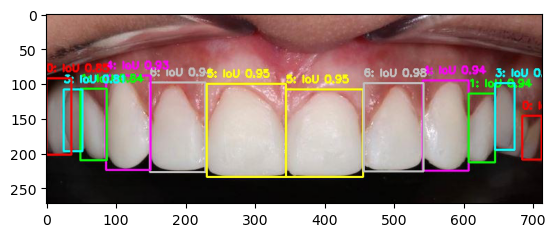

In [18]:
# path to images and annotations
test_images_path = os.getcwd() + '/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/'
test_labels_path = os.getcwd() + '/dental-anatomy-dataset-yolov8/Dental Dataset/test/labels/'

# 1. run 1st example
if __name__ == '__main__':
    validator=ValidateYOLO(
        model_path=best_weights,
        source=test_images_path + 'Fig141_PLS_JPG.rf.5363fe2fd9d4938c678c53acc37b5bec.jpg',
        label_file=test_labels_path + 'Fig141_PLS_JPG.rf.5363fe2fd9d4938c678c53acc37b5bec.txt',
        verbose=True,
        save_results=False,
    )
    first_results = validator.make_prediction()

# display predictions (with IoU scores)
plot_predictions_iou(
    validator.source,
    results=first_results,
    output_path='first_prediction.jpg',
    label_file=test_labels_path + 'Fig141_PLS_JPG.rf.5363fe2fd9d4938c678c53acc37b5bec.txt',
)

# plot results
pred_img = Image.open('first_prediction.jpg')
plt.imshow(pred_img)
plt.axis('on')
plt.show()


image 1/1 C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\test\images\Fig25_PLS_JPG.rf.4616bf4fdd69beb82badbd50a405b50c.jpg: 288x640 4 1st Molars, 4 1st Premolars, 1 2nd Molar, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 96.7ms
Speed: 3.3ms preprocess, 96.7ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 640)

----- Detection results -----
    pred_class  true_class       true_label  confidence       iou
0            5           5  Central Incisor    0.982473  0.936078
1            5           5  Central Incisor    0.967317  0.964081
2            6           6  Lateral Incisor    0.965673  0.977683
3            6           6  Lateral Incisor    0.965276  0.875598
4            6           6  Lateral Incisor    0.957868  0.966239
5            4           4           Canine    0.950067  0.928503
6            5           5  Central Incisor    0.941857  0.863931
7            4           4           Canine    0.93899

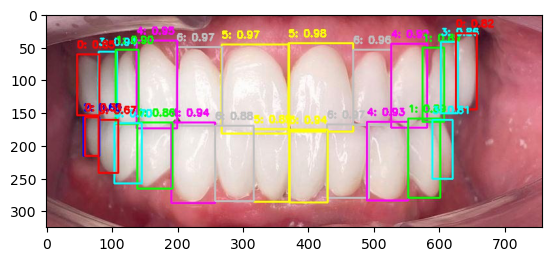

In [19]:
# 2. run 2nd example
if __name__ == '__main__':
    validator=ValidateYOLO(
        model_path=best_weights,
        source=test_images_path + 'Fig25_PLS_JPG.rf.4616bf4fdd69beb82badbd50a405b50c.jpg',
        label_file=test_labels_path + 'Fig25_PLS_JPG.rf.4616bf4fdd69beb82badbd50a405b50c.txt',
        verbose=True,
        save_results=False,
    )
    first_results = validator.make_prediction()

# display predictions (with confidence scores)
plot_predictions_conf(
    validator.source,
    results=first_results,
    output_path='second_prediction.jpg',
)

# plot results
pred_img = Image.open('second_prediction.jpg')
plt.imshow(pred_img)
plt.axis('on')
plt.show()


image 1/1 C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\test\images\Fig121_MYS_JPG.rf.6171a495979805b682c9d0653c2152bf.jpg: 608x640 2 1st Molars, 2 1st Premolars, 2 2nd Molars, 2 2nd Premolars, 2 Canines, 2 Central Incisors, 2 Lateral Incisors, 183.0ms
Speed: 5.7ms preprocess, 183.0ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)

----- Detection results -----
    pred_class  true_class       true_label  confidence       iou
0            2           2        2nd Molar    0.987295  0.944977
1            0           0        1st Molar    0.984985  0.893180
2            3           3     2nd Premolar    0.973061  0.847339
3            4           4           Canine    0.971053  0.950000
4            5           5  Central Incisor    0.967034  0.883239
5            4           4           Canine    0.965836  0.851728
6            5           5  Central Incisor    0.957649  0.903061
7            6           6  Lateral Incisor    0.9

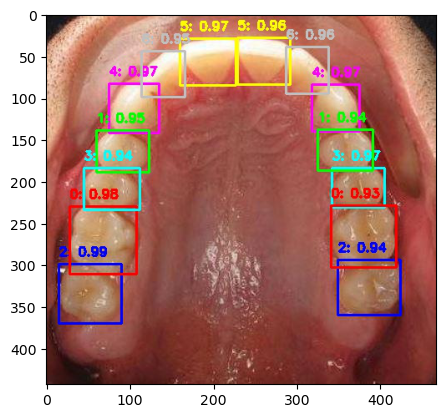

In [20]:
# 3. run 3rd example
if __name__ == '__main__':
    validator=ValidateYOLO(
        model_path=best_weights,
        source=test_images_path + 'Fig121_MYS_JPG.rf.6171a495979805b682c9d0653c2152bf.jpg',
        label_file=test_labels_path + 'Fig121_MYS_JPG.rf.6171a495979805b682c9d0653c2152bf.txt',
        verbose=True,
        save_results=False,
    )
    first_results = validator.make_prediction()

# display predictions
plot_predictions_conf(
    validator.source,
    results=first_results,
    output_path='third_prediction.jpg',
)

# plot results
pred_img = Image.open('third_prediction.jpg')
plt.imshow(pred_img)
plt.axis('on')
plt.show()


image 1/1 C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\test\images\Fig213_MYS_JPG.rf.ba4d7d640a5759356915a6396c0de2f8.jpg: 320x640 5 1st Molars, 4 1st Premolars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 79.6ms
Speed: 2.8ms preprocess, 79.6ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)

----- Detection results -----
    pred_class  true_class       true_label  confidence       iou
0            4           4           Canine    0.969658  0.921478
1            5           5  Central Incisor    0.965314  0.978261
2            6           6  Lateral Incisor    0.958103  0.932692
3            6           6  Lateral Incisor    0.956963  0.974783
4            6           6  Lateral Incisor    0.955917  0.871140
5            0           0        1st Molar    0.955462  0.765847
6            4           4           Canine    0.952116  0.893355
7            6           6  Lateral Incisor    0.948446  0.926119


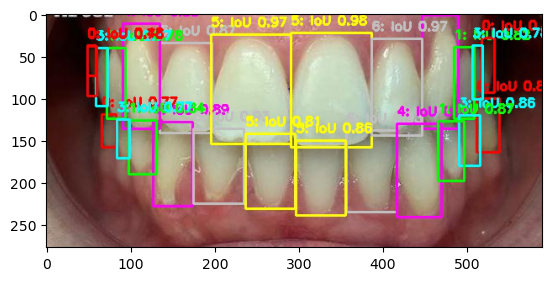

In [21]:
# 4. run 4th example
if __name__ == '__main__':
    validator=ValidateYOLO(
        model_path=best_weights,
        source=test_images_path + 'Fig213_MYS_JPG.rf.ba4d7d640a5759356915a6396c0de2f8.jpg',
        label_file=test_labels_path + 'Fig213_MYS_JPG.rf.ba4d7d640a5759356915a6396c0de2f8.txt',
        verbose=True,
        save_results=False,
    )
    first_results = validator.make_prediction()

# display predictions
plot_predictions_iou(
    validator.source,
    results=first_results,
    output_path='forth_prediction.jpg',
    label_file=test_labels_path + 'Fig213_MYS_JPG.rf.ba4d7d640a5759356915a6396c0de2f8.txt',
)

# plot results
pred_img = Image.open('forth_prediction.jpg')
plt.imshow(pred_img)
plt.axis('on')
plt.show()


image 1/1 C:\Users\MarcinSikorski\notebooks\teeth\dental-anatomy-dataset-yolov8\Dental Dataset\test\images\Fig45_PLS_JPG.rf.6c8993c7b04d87787151473d3ffb7104.jpg: 288x640 4 1st Molars, 4 1st Premolars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 103.5ms
Speed: 3.7ms preprocess, 103.5ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)

----- Detection results -----
    pred_class  true_class       true_label  confidence       iou
0            5           5  Central Incisor    0.984048  0.905150
1            6           6  Lateral Incisor    0.979300  0.907504
2            5           5  Central Incisor    0.971739  0.949787
3            5           5  Central Incisor    0.971467  0.954768
4            3           3     2nd Premolar    0.970806  0.868204
5            4           4           Canine    0.961165  0.955230
6            4           4           Canine    0.957222  0.876671
7            4           4           Canine    0.957200  0.925388

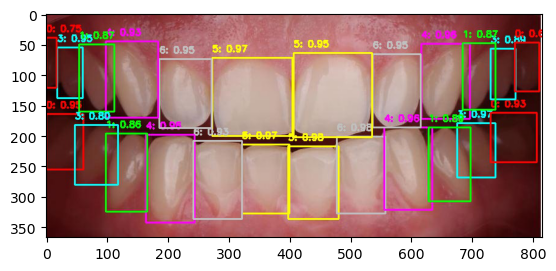

In [22]:
# 5. run 5th example
if __name__ == '__main__':
    validator=ValidateYOLO(
        model_path=best_weights,
        source=test_images_path + 'Fig45_PLS_JPG.rf.6c8993c7b04d87787151473d3ffb7104.jpg',
        label_file=test_labels_path + 'Fig45_PLS_JPG.rf.6c8993c7b04d87787151473d3ffb7104.txt',
        verbose=True,
        save_results=False,
    )
    first_results = validator.make_prediction()

# display predictions
plot_predictions_conf(
    validator.source,
    results=first_results,
    output_path='fifth_prediction.jpg',
)

# plot results
pred_img = Image.open('fifth_prediction.jpg')
plt.imshow(pred_img)
plt.axis('on')
plt.show()

The sample predictions made by YOLO11n are accurate. The network correctly identified the teeth anatomy in each image, and all predicted labels matched the ground truth labels. Based on confidence scores, incisors are easier to detect (with higher confidence), while molars tend to be more challenging to classify.

| **Example** | **Precision** | **Recall** | **F1 Score** | **mAP@50** | **mAP@50:95** | **Weighted<br>Fitness** | **Unweighted<br>Fitness** |
|-------------|---------------|------------|--------------|------------|---------------|-------------------------|---------------------------|
|    **1**    | 1.0000        | 0.9231     | 0.9600       | 1.0000     | 0.8417        | 0.9457                  | 0.9412                    |
|    **2**    | 0.9600        | 1.0000     | 0.9796       | 0.9600     | 0.7800        | 0.9329                  | 0.9250                    |
|    **3**    | 1.0000        | 1.0000     | 1.0000       | 1.0000     | 0.8286        | 0.9629                  | 0.9571                    |
|    **4**    | 0.9600        | 1.0000     | 0.9796       | 0.9600     | 0.7400        | 0.9264                  | 0.9150                    |
|    **5**    | 1.0000        | 1.0000     | 1.0000       | 1.0000     | 0.8417        | 0.9653                  | 0.9604                    |

* High precision and recall values suggest that the model is performing well in terms of both detecting objects and not falsely detecting them.
* The F1 score being close to 1 is a sign of a strong trade-off between precision and recall.
* High mAP@50 values indicate that YOLO model performs excellently in terms of average precision at IoU threshold 0.5, with very few false positives and missed objects.
* mAP@50:95 shows how the model performs across different IoU thresholds and are relatively high. This suggests that while the model is excellent at detecting objects when the IoU is 0.5, its performance decreases slightly as the IoU threshold increases. The model might be a bit lenient when evaluating overlaps, but it still maintains relatively good performance across all thresholds.
* Fitness describes the overall effectiveness and robustness in detecting objects and is quite strong in these cases. Unweighted fitness values are a bit lower than the weighted fitness scores, which may suggest that the model is performing slightly better when considering the importance of different factors or categories (in case weighted fitness takes these into account).

### 5. Conclusions

This project investigated the YOLO11n nano network, emphasizing its application for dental anatomy detection. This type of transfer learning, implementing a pre-defined model on a new dataset, proved to be very useful and accurate. The model demonstrated strong performance with high accuracy in detecting tooth anatomy across a variety of images. The network effectively identified different tooth classes and localized them with high precision. The fact that it requires only one forward propagation pass through the network makes it rapid to train and approximate its weights. 30 training epochs were enough for accurate results.

Additionally, the YOLO's ability to generate confidence scores allowed us to observe that certain tooth types, like incisors, were detected with greater confidence, while molars presented more challenges. This highlights potential areas for further improvement in the model, such as fine-tuning or enhancing the training dataset to include more diverse examples. Overall, YOLO11 proves to be a reliable and efficient tool for dental image analysis, with its speed and performance making it suitable for real-time applications.

**References:**
* J. Terven, D.M. Córdova-Esparza, J.A. Romero-González, 2023, *A Comprehensive Review of YOLO Architectures in Computer Vision: From YOLOv1 to YOLOv8 and YOLO-NAS*, [Full Text](https://www.mdpi.com/2504-4990/5/4/83)
* A.A. Alsuwaylimi, R. Alanazi, S.M. Alanazi, S.M. Alenezi, T. Saidani, R. Ghodhbani, 2024, *Improved and Efficient Object Detection Algorithm based on YOLOv5*, [Full Text](https://etasr.com/index.php/ETASR/article/view/7386/3674)
* J. Redmon, S. Divvala, R. Girshick, A. Farhadi, 2015, *You Only Look Once: Unified, Real-Time Object Detection*, [Full Text](https://arxiv.org/pdf/1506.02640v5)
* https://www.docs.ultralytics.com/models/yolo11/ [Accessed: 20.03.2025]
* https://www.v7labs.com/blog/intersection-over-union-guide#how-to-calculate-iou [Accessed: 20.03.2025]